<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Teste_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas:

import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy.interpolate as interp
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.optimize import curve_fit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JCGoran/GaPP (to revision feature/python3) to /tmp/pip-req-build-2z6lno9i
  Running command git clone --filter=blob:none --quiet https://github.com/JCGoran/GaPP /tmp/pip-req-build-2z6lno9i
  Running command git checkout -b feature/python3 --track origin/feature/python3
  Switched to a new branch 'feature/python3'
  Branch 'feature/python3' set up to track remote branch 'feature/python3' from 'origin'.
  Resolved https://github.com/JCGoran/GaPP to commit 931e4d0e0eb861b01c315e960f74b31a9996aa6f
  Preparing metadata (setup.py) ... done
  Created wheel for GaPP: filename=GaPP-1.0-py3-none-any.whl size=63958 sha256=b721232f70537e7f82de65aadd584268a1b5f71282d909d8eecd0b6318303cfa
  Stored in directory: /tmp/pip-ephem-wheel-cache-wczegqdp/wheels/ce/00/a9/051978c449722640db18aff4d8599b5b81dd35fc9c096657fe
Successfully built GaPP



Optimized hyperparameters:
theta = [0.66685457 2.0949801 ]


<ipython-input-4-4112465f2513>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')


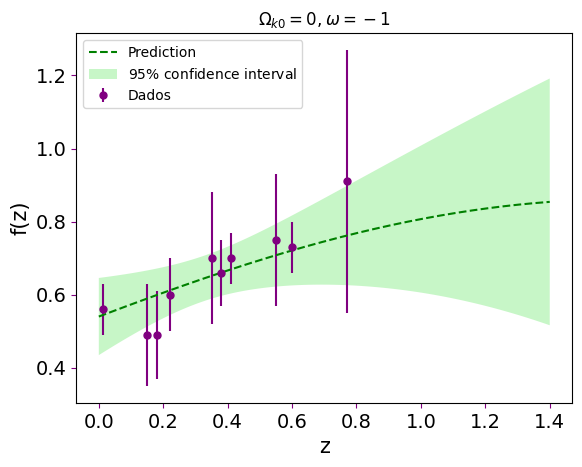

In [4]:
# TESTE 0: TIREI O ÚLTIMO PONTO

f_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91])
f_erro = np.array([0.07, 0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36])
z_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77])

# nomeando
x_gapp = z_dados
y_gapp = f_dados
e = f_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()


Optimized hyperparameters:
theta = [0.6766881  1.82610053]


<ipython-input-5-845780e0e57e>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x1_gapp, y1_gapp, e1, fmt='r.', color='purple', markersize=10, label='Dados')


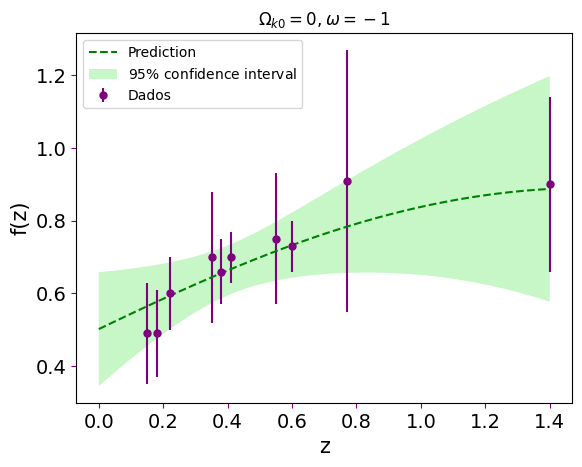

In [5]:
# TESTE 1: TIREI O PRIMEIRO PONTO

f1_dados = np.array([0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91, 0.90])
f1_erro = np.array([0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36, 0.24])
z1_dados = np.array([0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77, 1.40])

# nomeando
x1_gapp = z1_dados
y1_gapp = f1_dados
e1 = f1_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x1_gapp, y1_gapp, e1, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec1, theta) = g.gp(theta=initheta)

xi1 = rec1[:, 0]

y_pred1 = rec1[:, 1]
sigma1  = rec1[:, 2]

y_pred_95_less = y_pred1 - 1.9600*sigma1
y_pred_95_plus = y_pred1 + 1.9600*sigma1

# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x1_gapp, y1_gapp, e1, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi1, y_pred1, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi1, xi1[::-1]]),
         np.concatenate([y_pred1 - 1.9600 * sigma1,
                        (y_pred1 + 1.9600 * sigma1)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()


Optimized hyperparameters:
theta = [0.69829826 2.55648477]


<ipython-input-6-ebaed8f0e80f>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x2_gapp, y2_gapp, e2, fmt='r.', color='purple', markersize=10, label='Dados')


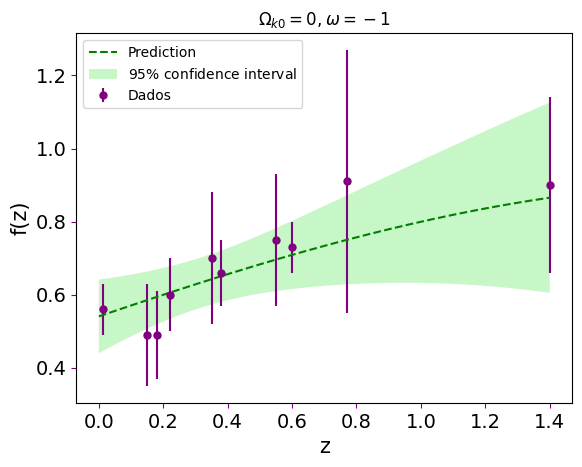

In [6]:
# TESTE 2: TIREI O SEXTO PONTO

f2_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.75, 0.73, 0.91, 0.90])
f2_erro = np.array([0.07, 0.14, 0.12, 0.10, 0.18, 0.09, 0.18, 0.07, 0.36, 0.24])
z2_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.55, 0.60, 0.77, 1.40])

# nomeando
x2_gapp = z2_dados
y2_gapp = f2_dados
e2 = f2_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x2_gapp, y2_gapp, e2, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec2, theta) = g.gp(theta=initheta)

xi2 = rec2[:, 0]

y_pred2 = rec2[:, 1]
sigma2  = rec2[:, 2]

y_pred_95_less = y_pred2 - 1.9600*sigma2
y_pred_95_plus = y_pred2 + 1.9600*sigma2

# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x2_gapp, y2_gapp, e2, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi2, y_pred2, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi2, xi2[::-1]]),
         np.concatenate([y_pred2 - 1.9600 * sigma2,
                        (y_pred2 + 1.9600 * sigma2)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()


Optimized hyperparameters:
theta = [0.70379866 1.51469563]


<ipython-input-7-7bf4ffdc4ca4>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x3_gapp, y3_gapp, e3, fmt='r.', color='purple', markersize=10, label='Dados')


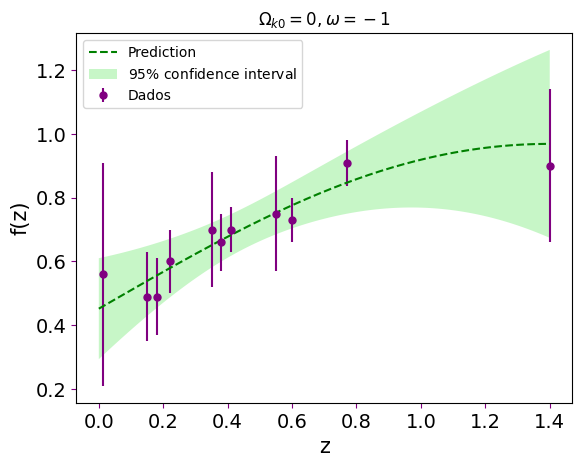

In [7]:
# TESTE 3: MEXER NAS BARRAS DE ERRO

f3_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91, 0.90])
f3_erro = np.array([0.07*5, 0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36*(1/5), 0.24])
z3_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77, 1.40])

# nomeando
x3_gapp = z3_dados
y3_gapp = f3_dados
e3 = f3_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x3_gapp, y3_gapp, e3, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec3, theta) = g.gp(theta=initheta)

xi3 = rec3[:, 0]

y_pred3 = rec3[:, 1]
sigma3  = rec3[:, 2]

y_pred_95_less = y_pred3 - 1.9600*sigma3
y_pred_95_plus = y_pred3 + 1.9600*sigma3

# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x3_gapp, y3_gapp, e3, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi3, y_pred3, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi3, xi3[::-1]]),
         np.concatenate([y_pred3 - 1.9600 * sigma3,
                        (y_pred3 + 1.9600 * sigma3)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()

Vamos integrar numericamente a equação (10) de Linder & Cahn, dada por:

$\gamma = \frac{1}{2} + \frac{1}{4} \int_0^1 \frac{du}{u} u^{5/2} \Omega_\omega (au)$.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

In [25]:
import sympy as sm
import pyccl as ccl

# MODELO LCDM
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.42, 1, 1000)  # fator de escala


# INTEGRAÇÃO

u = sp.Symbol('u', real=True)

# omega
OL0 = ccl.background.omega_x(cosmo, a, 'dark_energy')

I = (u**(3/2))*OL0

#A = sm.integrate(I, u)